# PRCP-1007-LiverPatientPred

# Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model with implementation of  different classifiers on liver patient diseases dataset to predict liver diseases.

Task3:- Create an analysis to show on what basis you have designed your model.  



In [1]:
#import datasets 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
data=pd.read_csv("sagarkunal.csv")
data

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Domain Analysis

In [5]:
data.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total Bilirubin             583 non-null    float64
 3   Direct Bilirubin            583 non-null    float64
 4   Alkaline Phosphotase        583 non-null    int64  
 5   Alamine Aminotransferase    583 non-null    int64  
 6   Aspartate Aminotransferase  583 non-null    int64  
 7   Total Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin and Globulin Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
data.describe()

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
data.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Protiens                0
Albumin                       0
Albumin and Globulin Ratio    4
Target                        0
dtype: int64

In [9]:
data.shape

(583, 11)

# EDA

1.UNIVARIATE ANALYSIS 

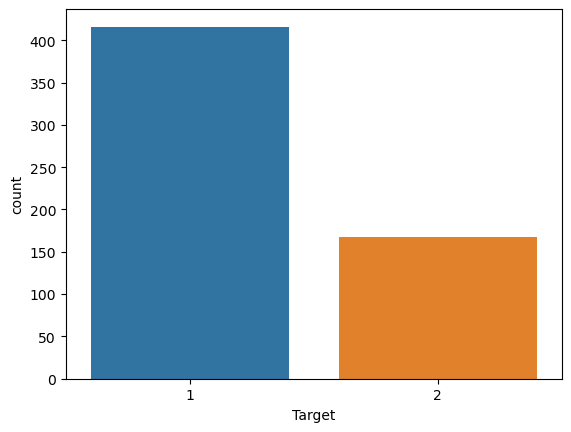

In [10]:
sns.countplot(x="Target",data=data)
plt.show()

In [11]:
data.Target.value_counts()

1    416
2    167
Name: Target, dtype: int64

# ●	Target: field used to split the data into two sets (1 : patient with  liver disease and 2: patient with no liver disease disease)

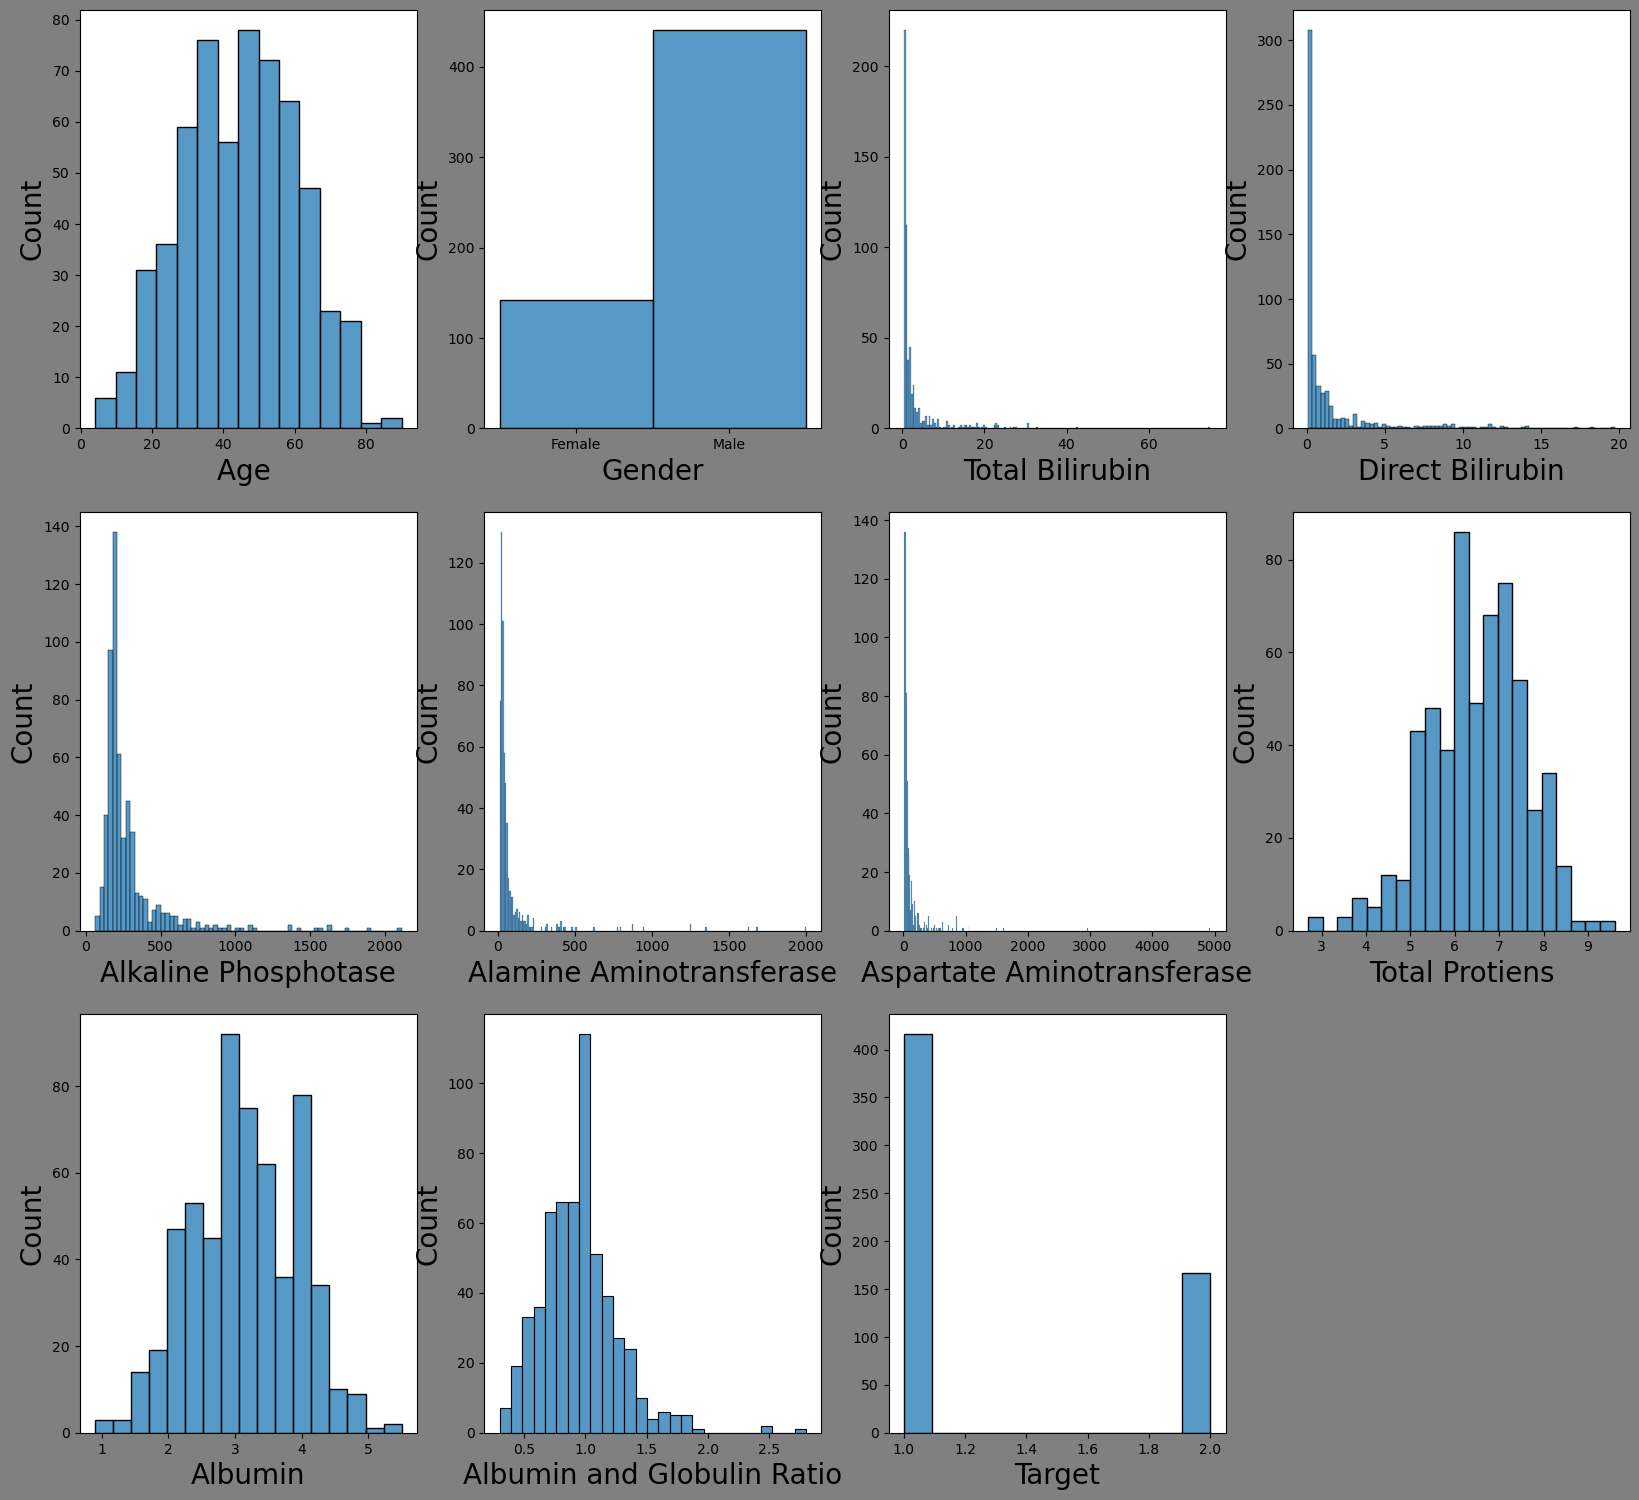

In [12]:
plt.figure(figsize=(20,25),facecolor='grey')
plotnumber=1

for column in data:
    ax=plt.subplot(4, 4, plotnumber)
    sns.histplot(data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
    
plt.show()


2.BIVARIATE ANALYSIS

In [13]:
data.Target.value_counts()

1    416
2    167
Name: Target, dtype: int64

In [14]:
data.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

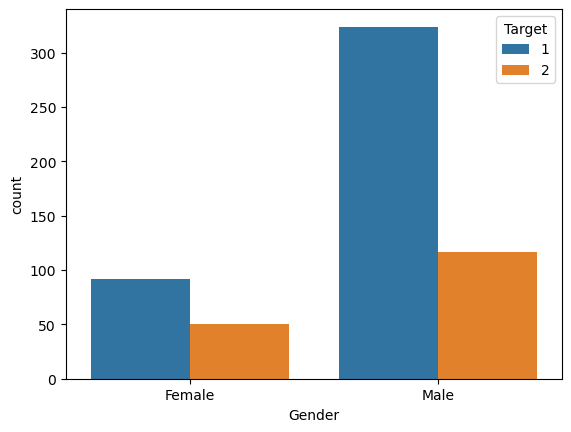

In [15]:
sns.countplot(x='Gender',hue='Target',data=data)
plt.show()

We can now see that number of liver disease in female is more this may be because the dominance in the male count so before doing model creation smooting and balancing the data should be done 

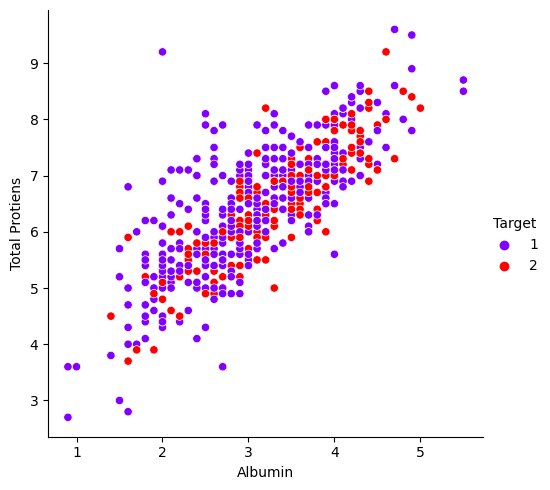

In [16]:
sns.relplot(x="Albumin",y="Total Protiens",hue="Target",palette="rainbow",data=data)
plt.show()


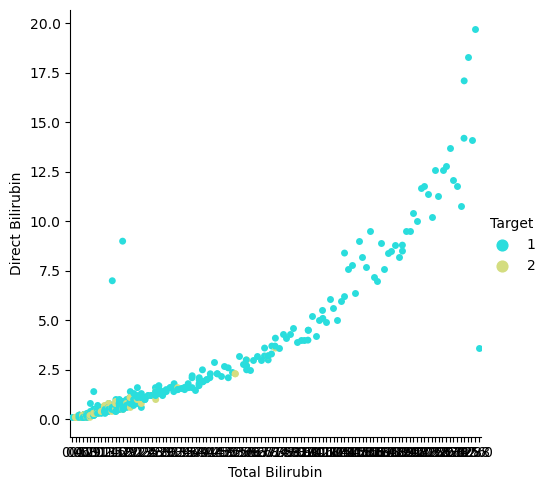

In [17]:
sns.catplot(x="Total Bilirubin",y="Direct Bilirubin",hue="Target",palette="rainbow",data=data)
plt.show()


No specific relationship can be found between Direct Bilirubin aand Total Bilirubin 

# Data PreProcessing and Feature Engineering 

#Converting caategorical data to numerical 

1.Handling the missing values 

In [21]:
data.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Protiens                0
Albumin                       0
Albumin and Globulin Ratio    0
Target                        0
dtype: int64

In [22]:
data.dropna(axis=0,inplace=True)
data.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Protiens                0
Albumin                       0
Albumin and Globulin Ratio    0
Target                        0
dtype: int64

2.Handling the corrupted values

3.Converting categorical to number 

In [23]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [24]:
data.Gender.value_counts()

Male      439
Female    140
Name: Gender, dtype: int64

In [25]:
Gender1=data[["Gender"]]
Gender1=pd.get_dummies(Gender1,drop_first=True)
Gender1

,Gender_Male
0,0
1,1
2,1
3,1
4,1
...,...
578,1
579,1
580,1
581,1


In [26]:
Gender1

,Gender_Male
0,0
1,1
2,1
3,1
4,1
...,...
578,1
579,1
580,1
581,1


In [27]:
data2=pd.concat([data,Gender1],axis=1)
data2

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,1


In [28]:
data3=data2.rename(columns={"Gender_Male":"gender"})
data3

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target,gender
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,1


In [29]:
data3.drop('Gender', axis=1, inplace=True)

In [30]:
data3

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target,gender
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,1


4.check for outliers

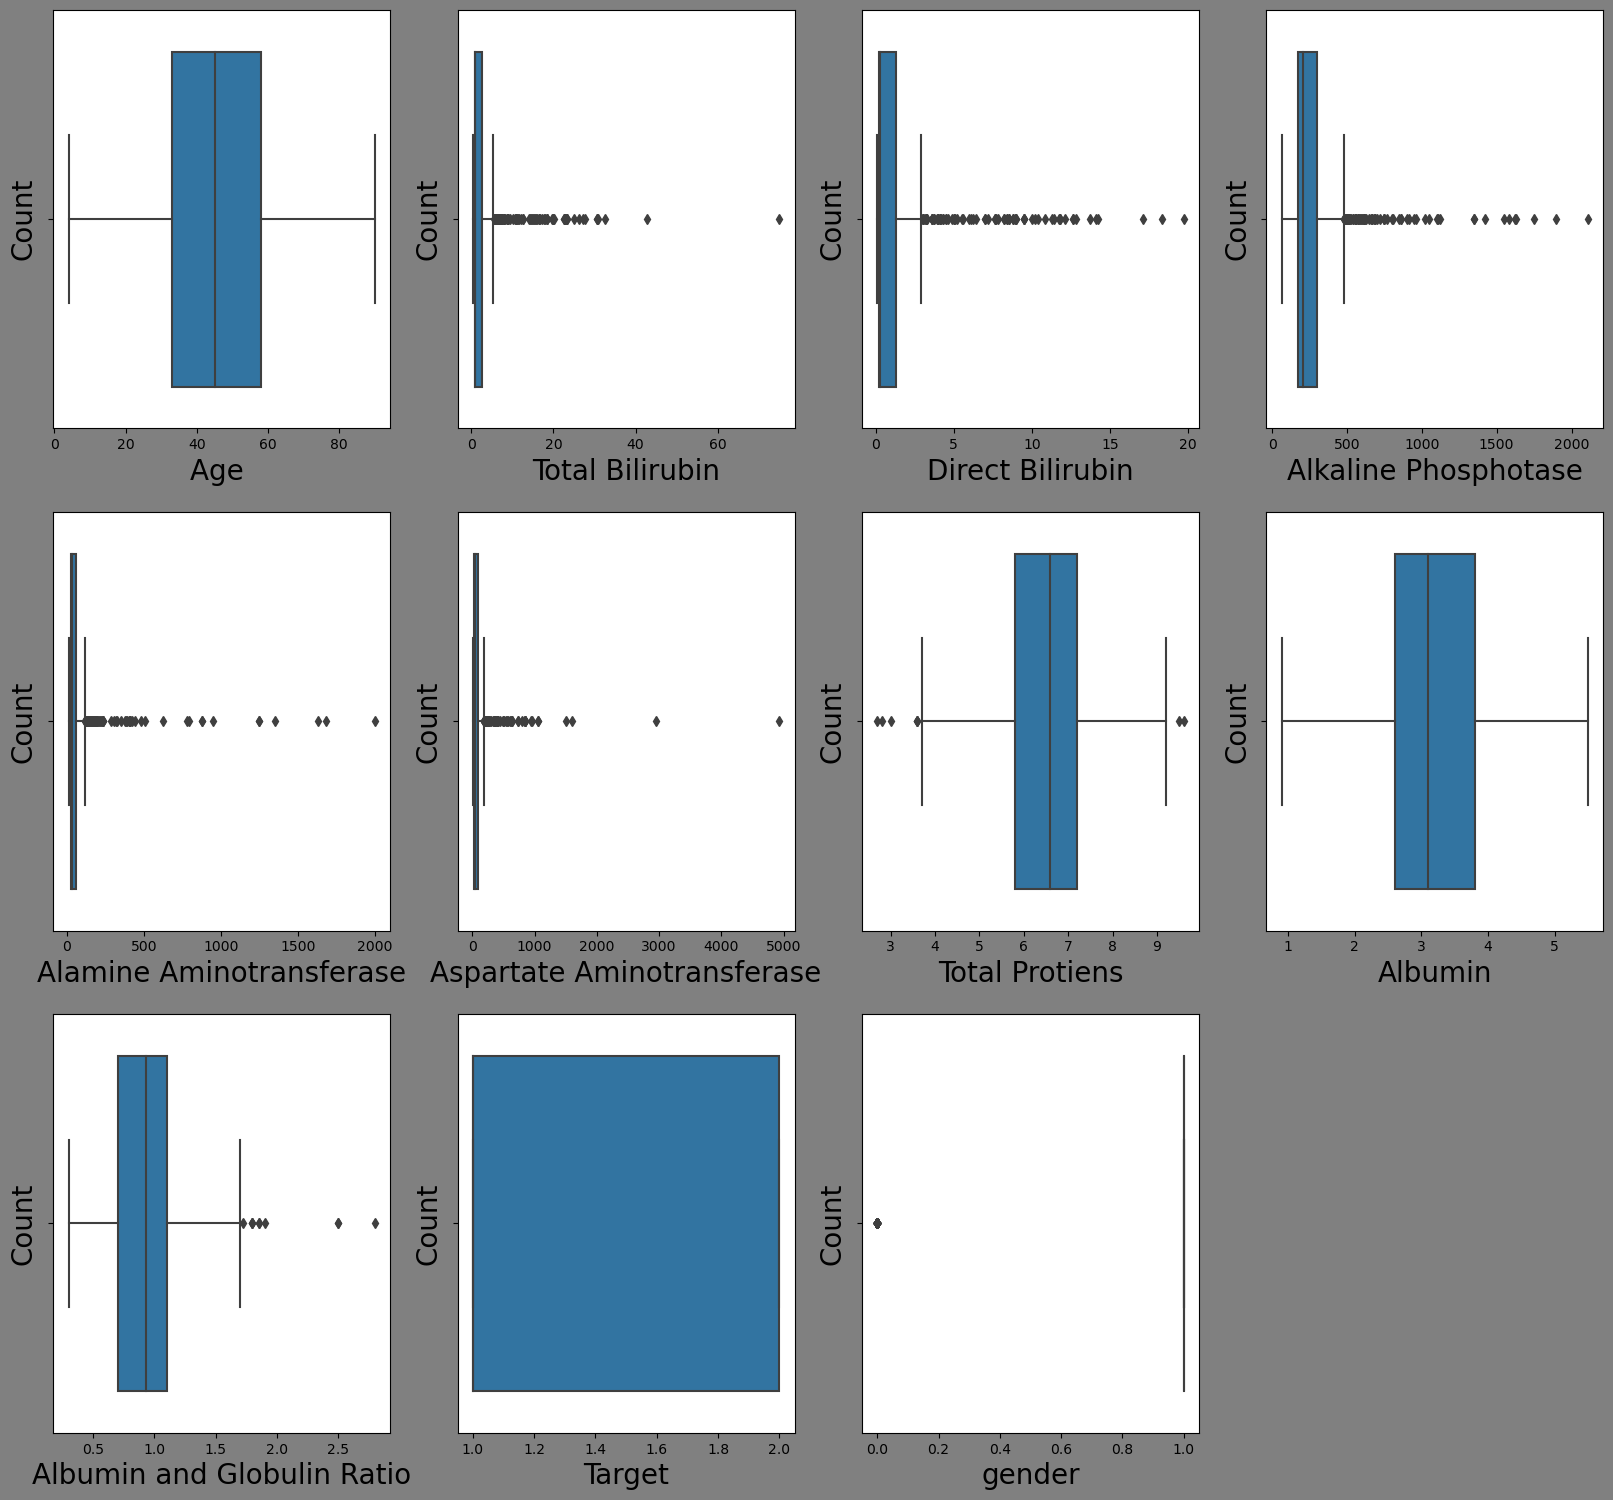

In [31]:
import warnings
warnings.filterwarnings("ignore")


plt.figure(figsize=(20,25),facecolor='grey')
plotnumber=1

for column in data3:
    ax=plt.subplot(4, 4, plotnumber)
    sns.boxplot(data3[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
    
plt.show()

we can see that there are many outliers in our data so it is necesssary to Handle out them so that out Model doesnot get affected 

In [32]:
#Handling the outliers 

1.Total Bilirubin

<AxesSubplot:xlabel='Total Bilirubin', ylabel='Density'>

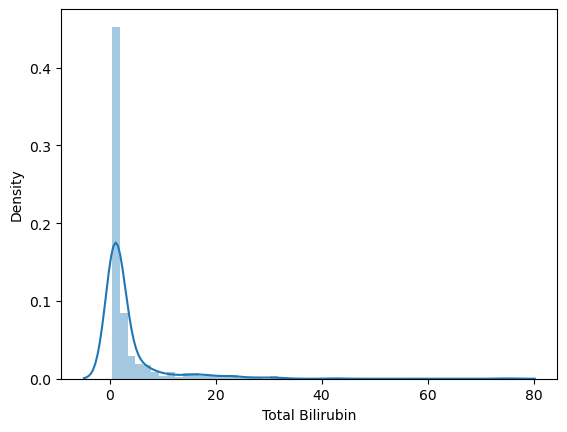

In [36]:
sns.distplot(data3['Total Bilirubin'].dropna())

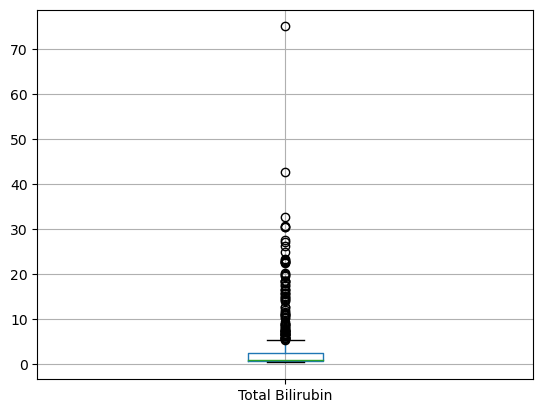

In [37]:
figure=data3.boxplot(column="Total Bilirubin")

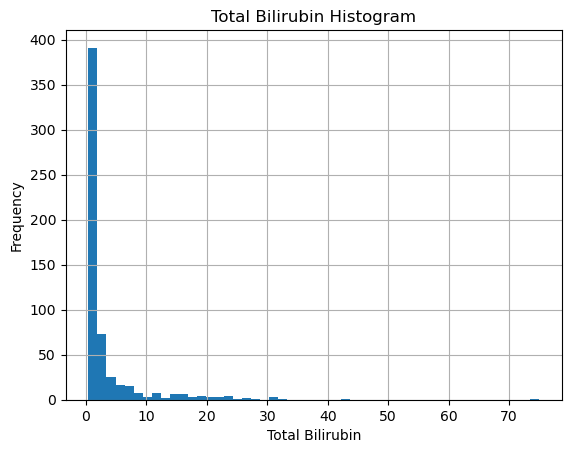

In [38]:
# Assuming that "data3" is a pandas DataFrame with a "Total Bilirubin" column
figure = data3["Total Bilirubin"].hist(bins=50)
figure.set_title('Total Bilirubin Histogram')
figure.set_xlabel('Total Bilirubin')
figure.set_ylabel('Frequency')
plt.show()


In [39]:
IQR=data3['Total Bilirubin'].quantile(0.75)-data3['Total Bilirubin'].quantile(0.25)

In [40]:
data3['Total Bilirubin'].describe()

count    579.000000
mean       3.315371
std        6.227716
min        0.400000
25%        0.800000
50%        1.000000
75%        2.600000
max       75.000000
Name: Total Bilirubin, dtype: float64

In [41]:
lower_bridge=data3['Total Bilirubin'].quantile(0.25)-(IQR*3)
upper_bridge=data3['Total Bilirubin'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-4.6000000000000005
8.0


(None, None)

In [42]:
data4=data3.copy()

In [43]:
data4.loc[data4['Total Bilirubin']>=8,'Total Bilirubin']=8

In [44]:
data4['Total Bilirubin'].describe()

count    579.000000
mean       2.258722
std        2.387824
min        0.400000
25%        0.800000
50%        1.000000
75%        2.600000
max        8.000000
Name: Total Bilirubin, dtype: float64

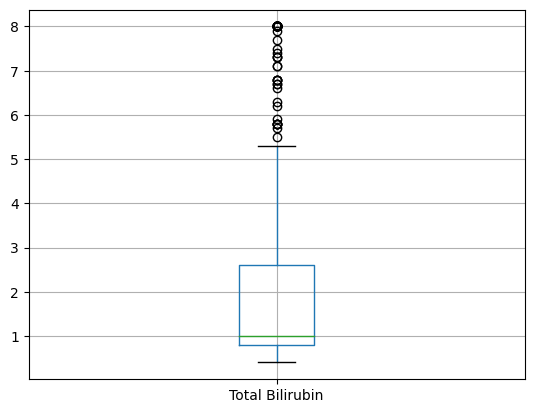

In [45]:
figure=data4.boxplot(column="Total Bilirubin")

2.Direct Bilirubin

<AxesSubplot:xlabel='Direct Bilirubin', ylabel='Density'>

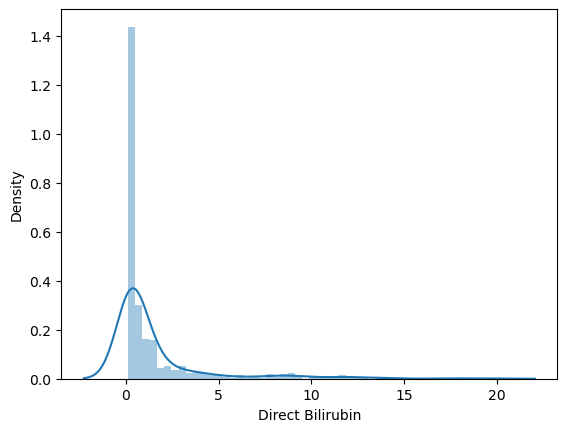

In [46]:
sns.distplot(data3['Direct Bilirubin'].dropna())

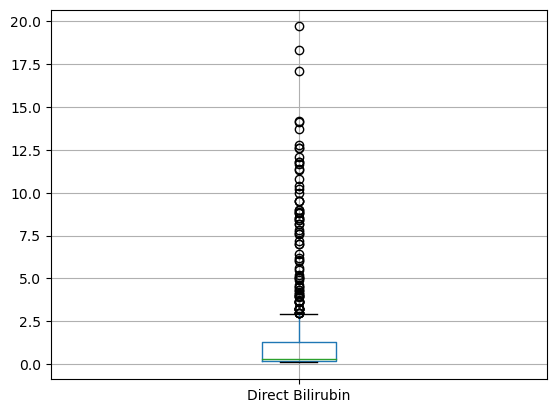

In [47]:
figure=data3.boxplot(column='Direct Bilirubin')

In [48]:
data3['Direct Bilirubin'].describe()

count    579.000000
mean       1.494128
std        2.816499
min        0.100000
25%        0.200000
50%        0.300000
75%        1.300000
max       19.700000
Name: Direct Bilirubin, dtype: float64

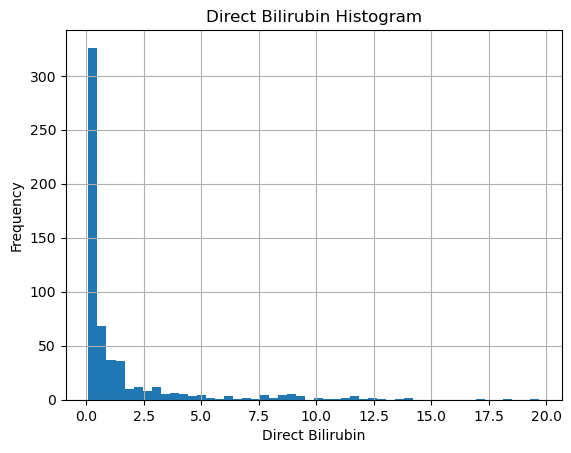

In [49]:
# Assuming that "data3" is a pandas DataFrame with a "Direct Bilirubin" column
figure = data3["Direct Bilirubin"].hist(bins=50)
figure.set_title('Direct Bilirubin Histogram')
figure.set_xlabel('Direct Bilirubin')
figure.set_ylabel('Frequency')
plt.show()


In [50]:
IQR=data3['Direct Bilirubin'].quantile(0.75)-data3['Direct Bilirubin'].quantile(0.25)

In [51]:
lower_bridge=data3['Direct Bilirubin'].quantile(0.25)-(IQR*1.5)
upper_bridge=data3['Direct Bilirubin'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-1.4500000000000002
2.95


(None, None)

In [52]:
lower_bridge=data3['Direct Bilirubin'].quantile(0.25)-(IQR*3)
upper_bridge=data3['Direct Bilirubin'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-3.1
4.6000000000000005


(None, None)

In [53]:
data4.loc[data4['Direct Bilirubin']>=4.6,'Direct Bilirubin']=4.6

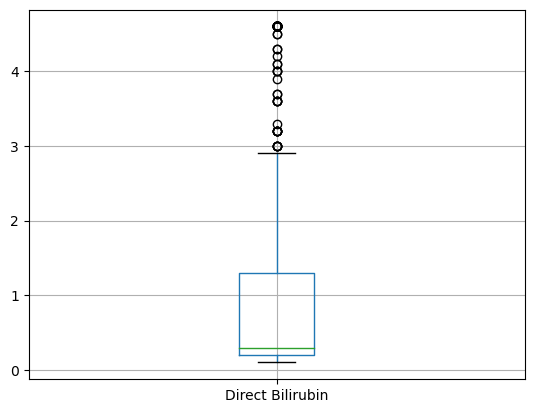

In [54]:
figure=data4.boxplot(column="Direct Bilirubin")

3.Alkaline Phosphotase

<AxesSubplot:xlabel='Alkaline Phosphotase', ylabel='Density'>

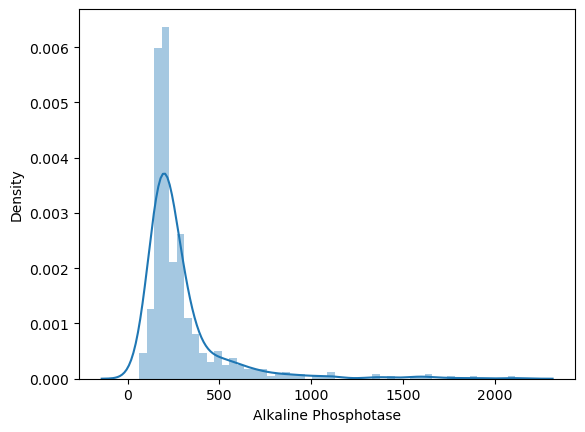

In [55]:
sns.distplot(data3['Alkaline Phosphotase'].dropna())

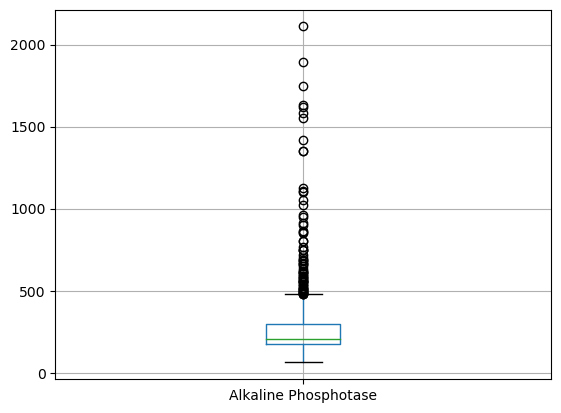

In [56]:
figure=data3.boxplot(column='Alkaline Phosphotase')

In [57]:
data3['Alkaline Phosphotase'].describe()

count     579.000000
mean      291.366149
std       243.561863
min        63.000000
25%       175.500000
50%       208.000000
75%       298.000000
max      2110.000000
Name: Alkaline Phosphotase, dtype: float64

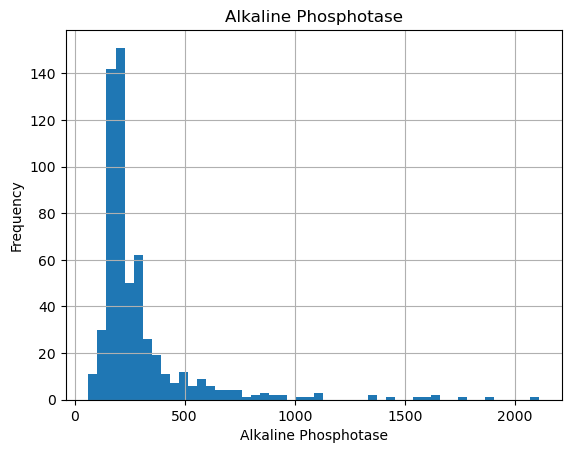

In [58]:
# Assuming that "data3" is a pandas DataFrame with a "Alkaline Phosphotase" column
figure = data3["Alkaline Phosphotase"].hist(bins=50)
figure.set_title('Alkaline Phosphotase')
figure.set_xlabel('Alkaline Phosphotase')
figure.set_ylabel('Frequency')
plt.show()


In [59]:
IQR=data3['Alkaline Phosphotase'].quantile(0.75)-data3['Alkaline Phosphotase'].quantile(0.25)

In [60]:
lower_bridge=data3['Alkaline Phosphotase'].quantile(0.25)-(IQR*1.5)
upper_bridge=data3['Alkaline Phosphotase'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-8.25
481.75


(None, None)

In [61]:
lower_bridge=data3['Alkaline Phosphotase'].quantile(0.25)-(IQR*3)
upper_bridge=data3['Alkaline Phosphotase'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-192.0
665.5


(None, None)

In [62]:
data4.loc[data4['Alkaline Phosphotase']>=665.5,'Alkaline Phosphotase']=665.5

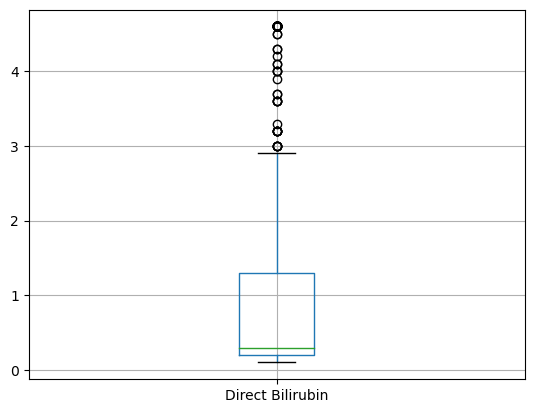

In [63]:
figure=data4.boxplot(column="Direct Bilirubin")

4.Alamine Aminotransferase

<AxesSubplot:xlabel='Alamine Aminotransferase', ylabel='Density'>

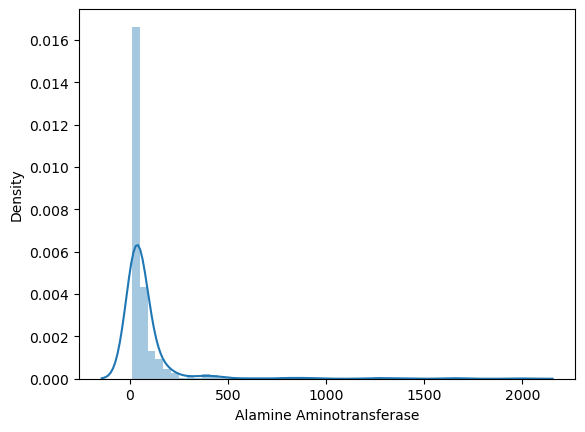

In [64]:
sns.distplot(data3['Alamine Aminotransferase'].dropna())

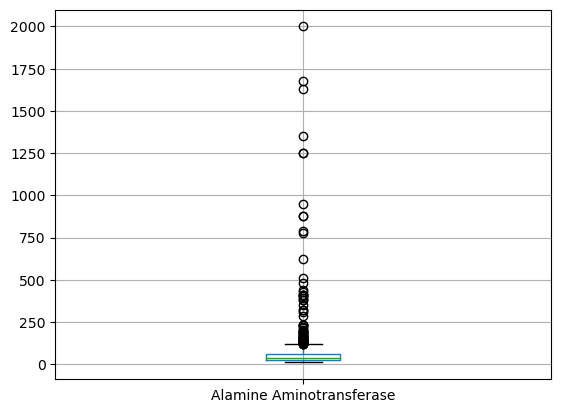

In [65]:
figure=data3.boxplot(column='Alamine Aminotransferase')

In [66]:
data3['Alamine Aminotransferase'].describe()

count     579.000000
mean       81.126079
std       183.182845
min        10.000000
25%        23.000000
50%        35.000000
75%        61.000000
max      2000.000000
Name: Alamine Aminotransferase, dtype: float64

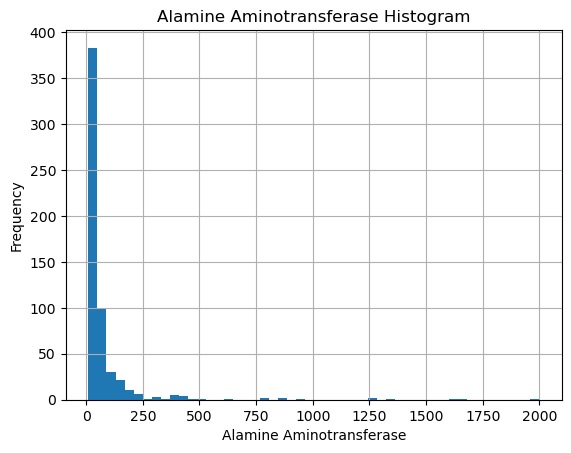

In [67]:
# Assuming that "data3" is a pandas DataFrame with a "Alamine Aminotransferase" column
figure = data3["Alamine Aminotransferase"].hist(bins=50)
figure.set_title('Alamine Aminotransferase Histogram')
figure.set_xlabel('Alamine Aminotransferase')
figure.set_ylabel('Frequency')
plt.show()


In [68]:
IQR=data3['Alamine Aminotransferase'].quantile(0.75)-data3['Alamine Aminotransferase'].quantile(0.25)

In [69]:
lower_bridge=data3['Alamine Aminotransferase'].quantile(0.25)-(IQR*1.5)
upper_bridge=data3['Alamine Aminotransferase'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-34.0
118.0


(None, None)

In [70]:
lower_bridge=data3['Alamine Aminotransferase'].quantile(0.25)-(IQR*3)
upper_bridge=data3['Alamine Aminotransferase'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-91.0
175.0


(None, None)

In [71]:
data4.loc[data4['Alamine Aminotransferase']>=175,'Alamine Aminotransferase']=175

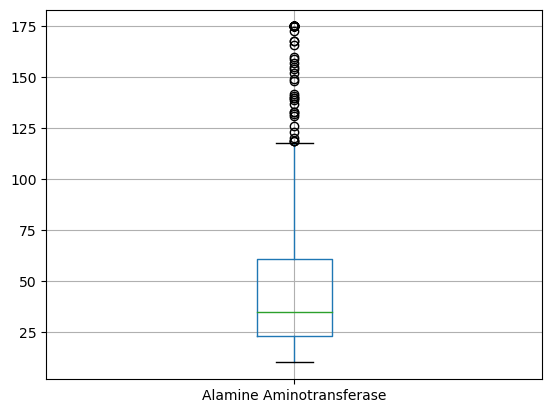

In [72]:
figure=data4.boxplot(column="Alamine Aminotransferase")

5.Aspartate Aminotransferase

<AxesSubplot:xlabel='Aspartate Aminotransferase', ylabel='Density'>

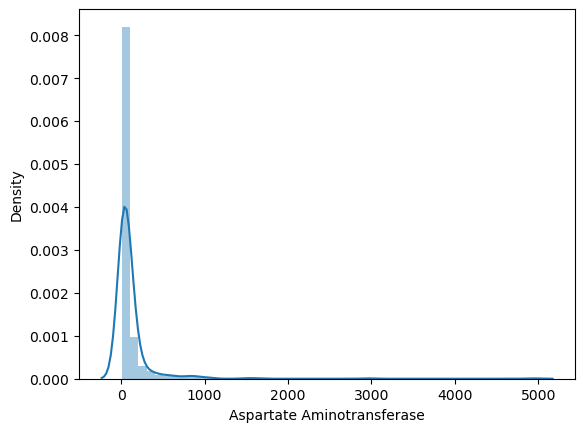

In [73]:
sns.distplot(data3['Aspartate Aminotransferase'].dropna())

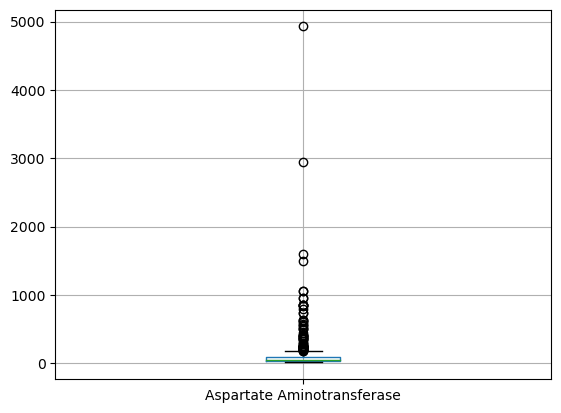

In [74]:
figure=data3.boxplot(column='Aspartate Aminotransferase')

In [75]:
data3['Aspartate Aminotransferase'].describe()

count     579.000000
mean      110.414508
std       289.850034
min        10.000000
25%        25.000000
50%        42.000000
75%        87.000000
max      4929.000000
Name: Aspartate Aminotransferase, dtype: float64

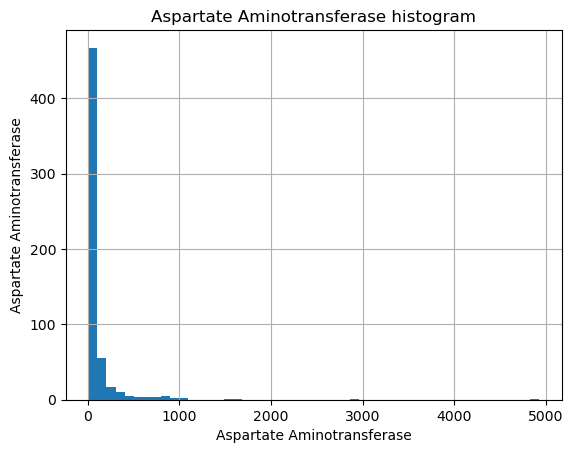

In [76]:
# Assuming that "data3" is a pandas DataFrame with a "Aspartate Aminotransferase" column
figure = data3["Aspartate Aminotransferase"].hist(bins=50)
figure.set_title('Aspartate Aminotransferase histogram')
figure.set_xlabel('Aspartate Aminotransferase')
figure.set_ylabel('Aspartate Aminotransferase')
plt.show()


In [77]:
IQR=data3['Aspartate Aminotransferase'].quantile(0.75)-data3['Aspartate Aminotransferase'].quantile(0.25)

In [78]:
lower_bridge=data3['Aspartate Aminotransferase'].quantile(0.25)-(IQR*1.5)
upper_bridge=data3['Aspartate Aminotransferase'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-68.0
180.0


(None, None)

In [79]:
lower_bridge=data3['Aspartate Aminotransferase'].quantile(0.25)-(IQR*3)
upper_bridge=data3['Aspartate Aminotransferase'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-161.0
273.0


(None, None)

In [80]:
data4.loc[data4['Aspartate Aminotransferase']>=273,'Aspartate Aminotransferase']=273

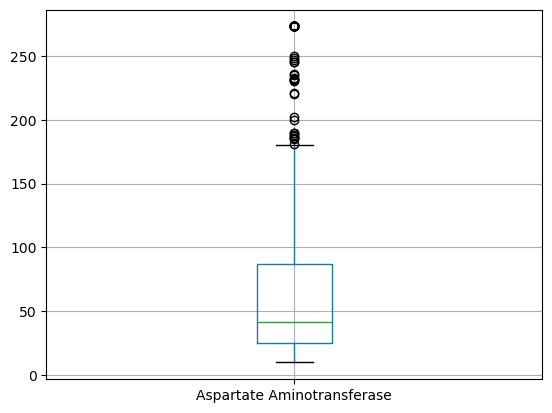

In [81]:
figure=data4.boxplot(column="Aspartate Aminotransferase")

7.Albumin

<AxesSubplot:xlabel='Albumin', ylabel='Density'>

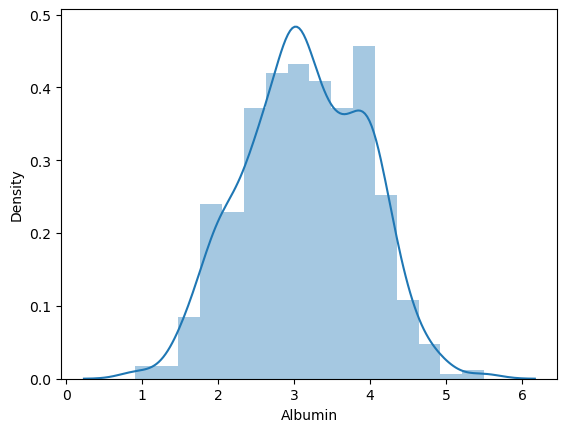

In [82]:
sns.distplot(data3['Albumin'].dropna())

8. Albumin and Globulin Ratio

<AxesSubplot:xlabel='Albumin and Globulin Ratio', ylabel='Density'>

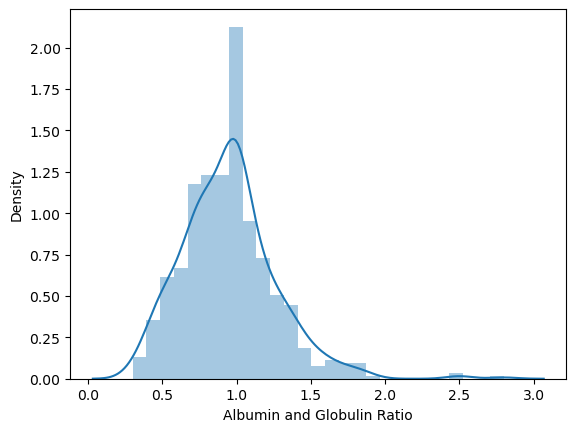

In [83]:
sns.distplot(data3['Albumin and Globulin Ratio'].dropna())

In [84]:
IQR=data3['Albumin and Globulin Ratio'].quantile(0.75)-data3['Albumin and Globulin Ratio'].quantile(0.25)

In [85]:
lower_bridge=data3['Albumin and Globulin Ratio'].quantile(0.25)-(IQR*1.5)
upper_bridge=data3['Albumin and Globulin Ratio'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.09999999999999976
1.7000000000000002


(None, None)

In [86]:
data4.loc[data4['Albumin and Globulin Ratio']>=1.7,'Albumin and Globulin Ratio']=1.7

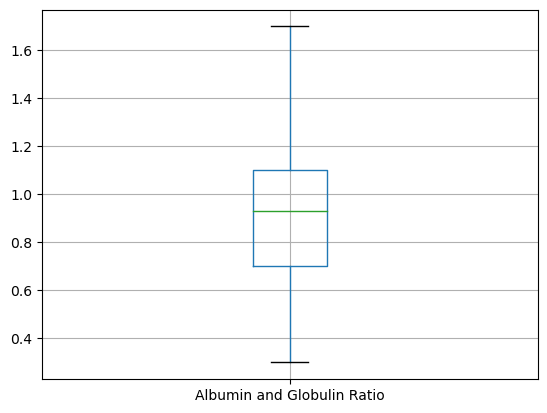

In [88]:
figure=data4.boxplot(column='Albumin and Globulin Ratio')

In [89]:
data3['Albumin and Globulin Ratio'].describe()

count    579.000000
mean       0.947064
std        0.319592
min        0.300000
25%        0.700000
50%        0.930000
75%        1.100000
max        2.800000
Name: Albumin and Globulin Ratio, dtype: float64

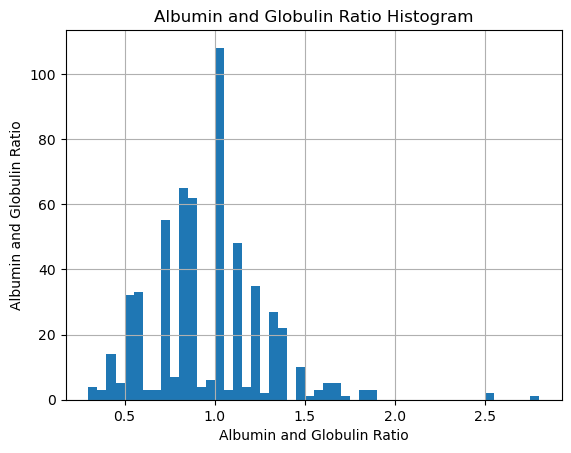

In [90]:
# Assuming that "data3" is a pandas DataFrame with a "Albumin and Globulin Ratio" column
figure = data3["Albumin and Globulin Ratio"].hist(bins=50)
figure.set_title('Albumin and Globulin Ratio Histogram')
figure.set_xlabel('Albumin and Globulin Ratio')
figure.set_ylabel('Albumin and Globulin Ratio')
plt.show()


In [91]:
IQR=data3['Albumin and Globulin Ratio'].quantile(0.75)-data3['Albumin and Globulin Ratio'].quantile(0.25)

In [92]:
lower_bridge=data3['Albumin and Globulin Ratio'].quantile(0.25)-(IQR*1.5)
upper_bridge=data3['Albumin and Globulin Ratio'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.09999999999999976
1.7000000000000002


(None, None)

In [93]:
lower_bridge=data3['Albumin and Globulin Ratio'].quantile(0.25)-(IQR*3)
upper_bridge=data3['Albumin and Globulin Ratio'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-0.5000000000000004
2.3000000000000007


(None, None)

In [94]:
data4.loc[data4['Albumin and Globulin Ratio']>=1.7,'Albumin and Globulin Ratio']=1.7

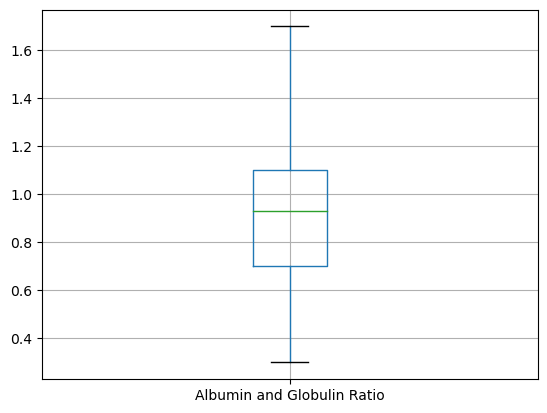

In [95]:
figure=data4.boxplot(column="Albumin and Globulin Ratio")

In [96]:
data4.head(20)

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target,gender
0,65,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1,0
1,62,8.0,4.6,665.5,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1,1
5,46,1.8,0.7,208.0,19,14,7.6,4.4,1.30,1,1
6,26,0.9,0.2,154.0,16,12,7.0,3.5,1.00,1,0
7,29,0.9,0.3,202.0,14,11,6.7,3.6,1.10,1,0
8,17,0.9,0.3,202.0,22,19,7.4,4.1,1.20,2,1
9,55,0.7,0.2,290.0,53,58,6.8,3.4,1.00,1,1


In [97]:
data4.describe()

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target,gender
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,2.258722,1.065630,267.012090,53.775475,73.290155,6.481693,3.138515,0.940984,1.284974,0.758204
std,16.221786,2.387824,1.412038,145.927403,46.532662,73.732370,1.084641,0.794435,0.297361,0.451792,0.428542
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000,1.000000
max,90.000000,8.000000,4.600000,665.500000,175.000000,273.000000,9.600000,5.500000,1.700000,2.000000,1.000000


5.Scaling the data 

In [98]:
d2=data4[["gender","Target"]]


In [99]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data4[['Total Bilirubin','Direct Bilirubin','Alkaline Phosphotase','Alamine Aminotransferase','Aspartate Aminotransferase','Total Protiens','Albumin','Albumin and Globulin Ratio']]=scale.fit_transform(data[['Total Bilirubin','Direct Bilirubin','Alkaline Phosphotase','Alamine Aminotransferase','Aspartate Aminotransferase','Total Protiens','Albumin','Albumin and Globulin Ratio']])



In [100]:
data4

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target,gender
0,65,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1,0
1,62,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1,1
2,62,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1,1
3,58,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1,1
4,72,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.028,2,1
579,40,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.320,1,1
580,52,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.280,1,1
581,31,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.280,1,1


# FEATURE SELECTION

<AxesSubplot:>

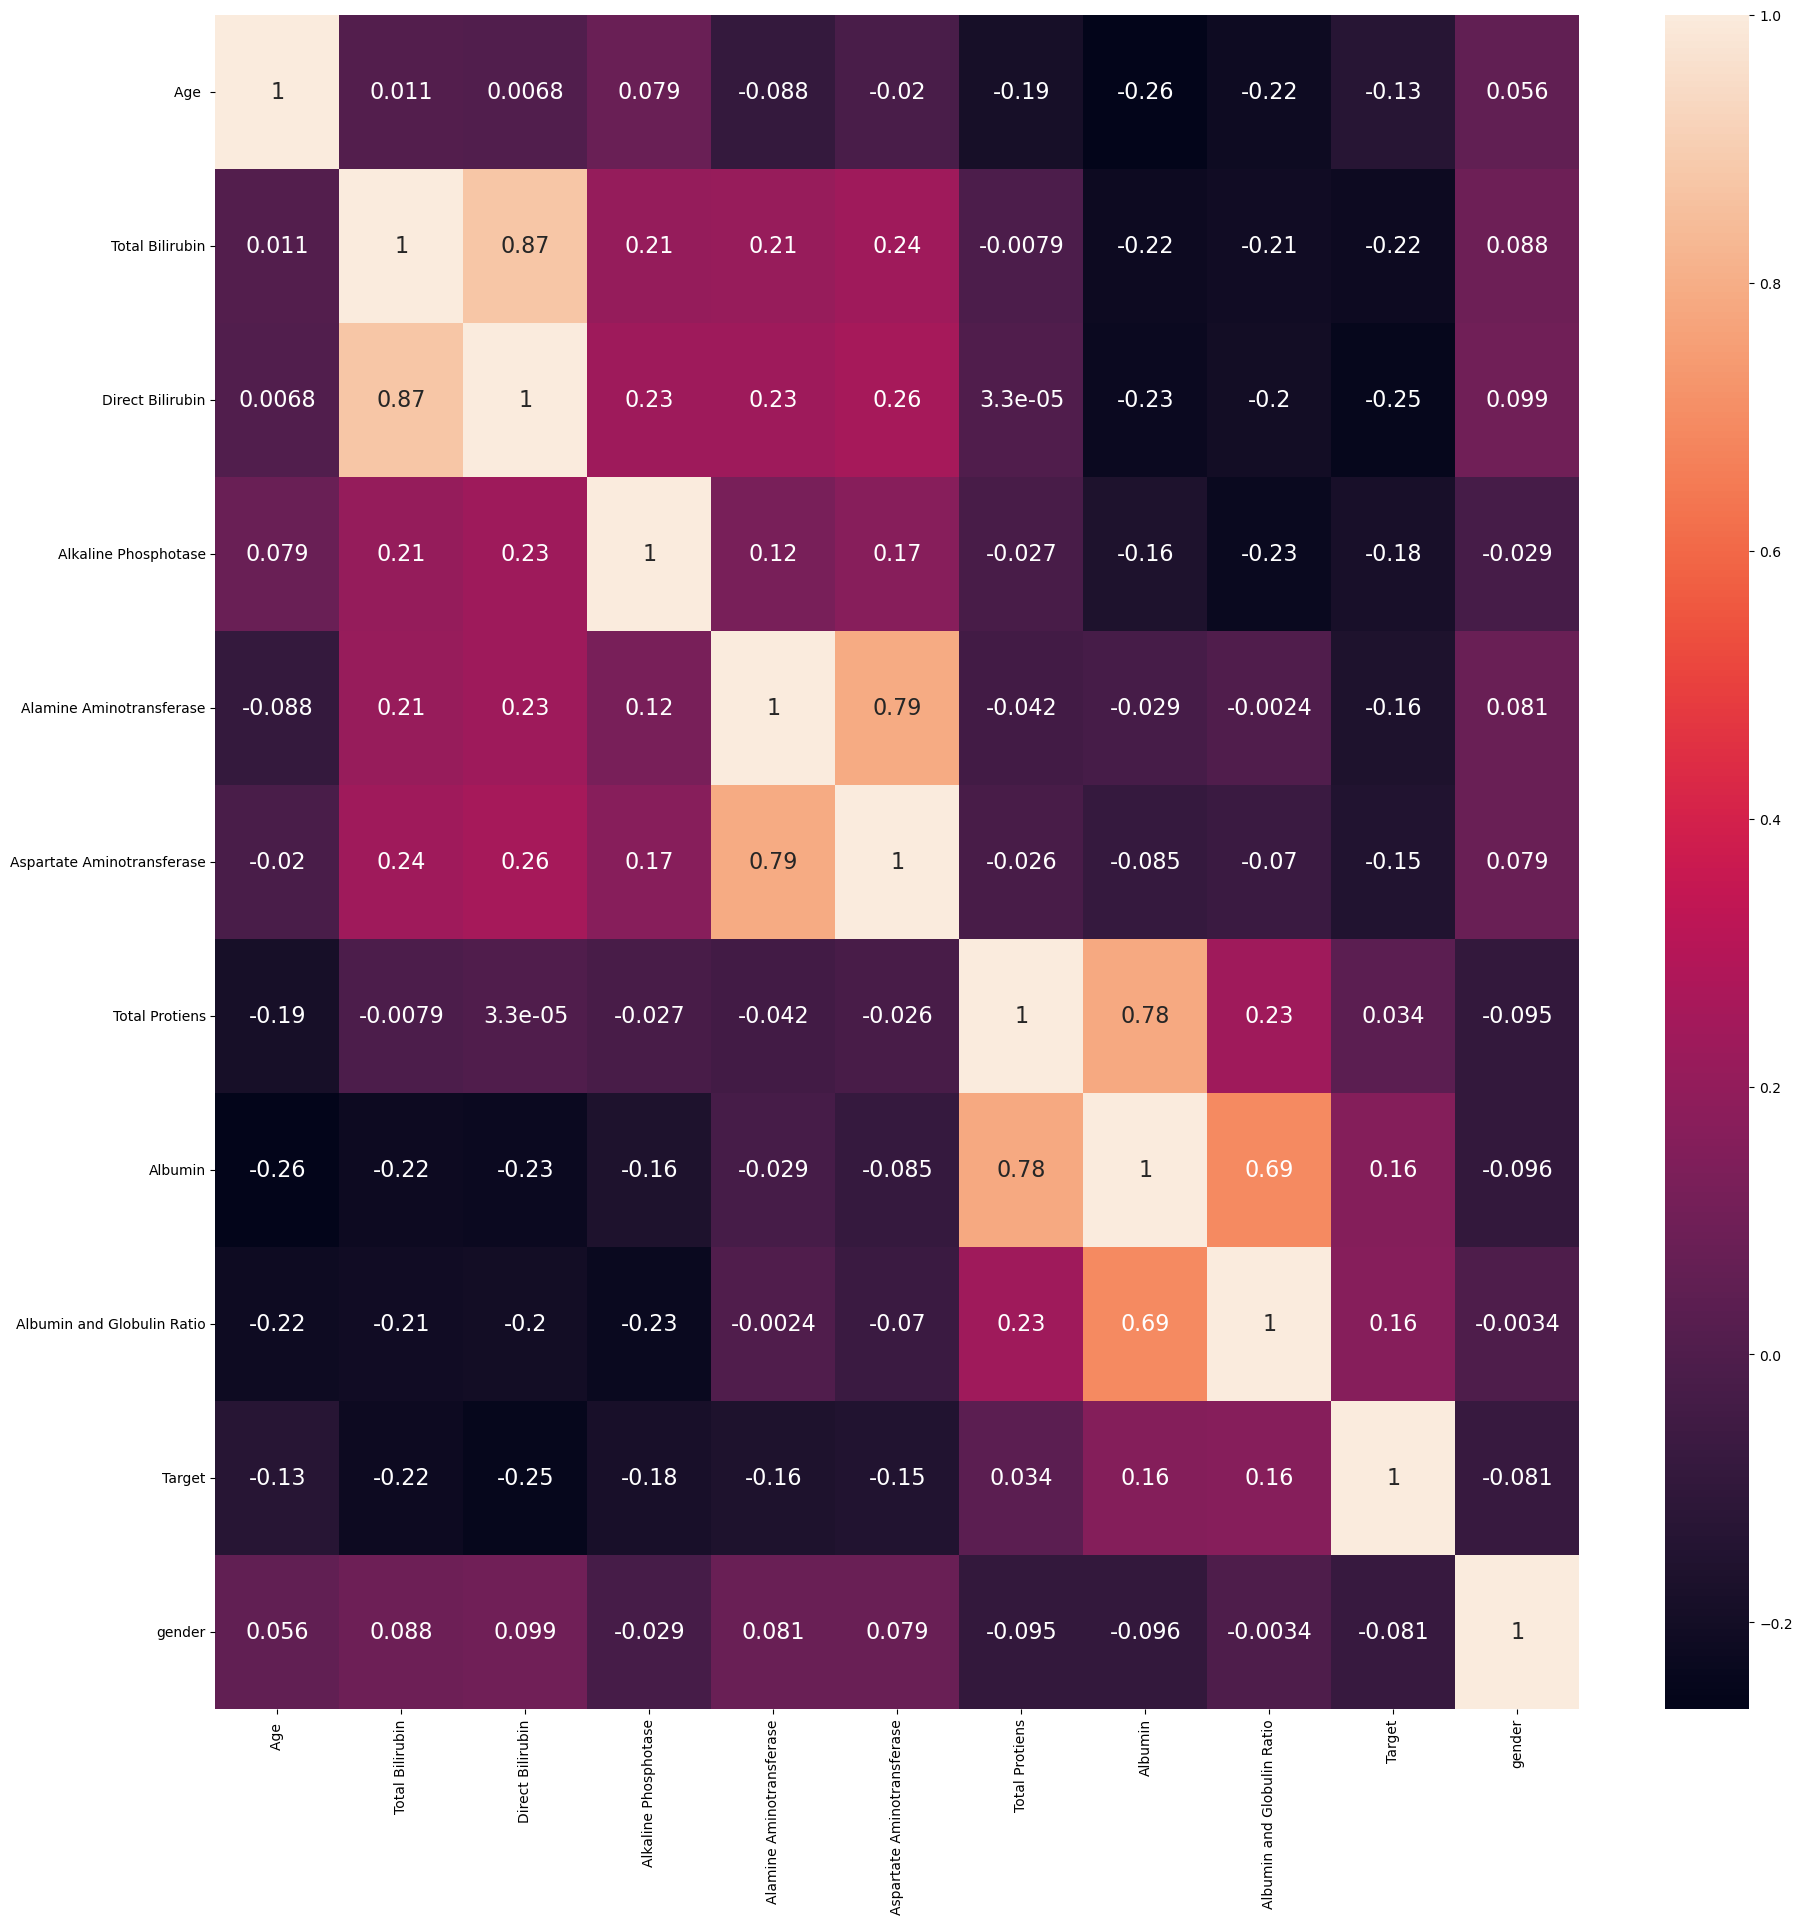

In [101]:
#Checking the correlation
plt.figure(figsize=(22,22))
sns.heatmap(data4.corr(),annot=True,annot_kws={"fontsize": 16})

In [102]:
#Checking the balance of Target data 

In [103]:
data4.Target.value_counts()

1    414
2    165
Name: Target, dtype: int64

Splitting of the dependent and independent data need to be done 

In [104]:
X=data4.loc[:,['Age ', 'Total Bilirubin', 'Direct Bilirubin', 'Alkaline Phosphotase',
       'Alamine Aminotransferase', 'Aspartate Aminotransferase',
       'Total Protiens', 'Albumin', 'Albumin and Globulin Ratio', 
       'gender']] ## X variable contains all inputs
y=data.Target ## y is output

In [105]:
X

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,gender
0,65,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0
1,62,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,62,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,58,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,72,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1
...,...,...,...,...,...,...,...,...,...,...
578,60,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.028,1
579,40,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.320,1
580,52,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.280,1
581,31,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.280,1


In [106]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Target, Length: 579, dtype: int64

In [107]:
y.shape

(579,)

In [108]:
y.value_counts()

1    414
2    165
Name: Target, dtype: int64

Since the data is imbalanced we need to balance the data by smooting

In [109]:
# Apply SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [110]:
X_smote, y_smote = smote.fit_resample(X, y)

In [111]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 414, 2: 165})
SMOTE Classes Counter({1: 414, 2: 414})


In [112]:
y_smote.value_counts()

1    414
2    414
Name: Target, dtype: int64

Now since the Dependent data is now balanced we can proceed with Training followed by Model Creation .

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.2, random_state=24) 

In [114]:
y_train.value_counts()

2    332
1    330
Name: Target, dtype: int64

# 1.LOGISTIC REGRESSION

Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class.If the estimated probability is greater than 50% then the model predicts that the instance belongs to that class(called the positive class ,labeled as '1') or else it predict that it does not
(that is it belongs to the negative class ,labeled as 'o' ).This make it a binary classifier

In [115]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)  ## training

LogisticRegression()

In [116]:
y_pred=clf.predict(X_test)
y_pred


array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1], dtype=int64)

In [117]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score
acc=accuracy_score(y_test,y_pred)
acc

0.7048192771084337

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.79      0.57      0.66        84
           2       0.66      0.84      0.74        82

    accuracy                           0.70       166
   macro avg       0.72      0.71      0.70       166
weighted avg       0.72      0.70      0.70       166



In [119]:
cm1=pd.crosstab(y_test,y_pred)
cm1

col_0,1,2
Target,,
1,48,36
2,13,69


In [120]:
recall=recall_score(y_test,y_pred)
recall

0.5714285714285714

In [254]:
f1=f1_score(y_test,y_pred)
f1                             # F1 score considers both Precision and Recall for evaluating a model


0.6272189349112427

In [252]:
y_train_predict=clf.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train


0.8196457326892109

In [253]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           1       0.86      0.78      0.82       318
           2       0.79      0.86      0.82       303

    accuracy                           0.82       621
   macro avg       0.82      0.82      0.82       621
weighted avg       0.82      0.82      0.82       621



# 2.ARTIFICIAL NEURAL NETWORK 

In [283]:
## model creation for testing data 
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),learning_rate_init=0.1,max_iter=100,random_state=12) 
model.fit(X_train,y_train) ## training the data

# 50 neurons, 3 hidden layers
# learning_rate_init is used to initial learning rate: controls the step-size in updating the weights

MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=100,
              random_state=12)

In [284]:
y_predict_proba = model.predict_proba(X_test) ## predicting the probability of class
y_predict = model.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [285]:
## Evaluating the model creation 
from sklearn.metrics import accuracy_score,confusion_matrix 
print("Test accuracy :",accuracy_score(y_test,y_predict))

Test accuracy : 0.463768115942029


In [289]:
f1=f1_score(y_test,y_predict)
f1                             # F1 score considers both Precision and Recall for evaluating a model


0.6336633663366337

In [287]:
## getting the confusion matrix
c1=pd.crosstab(y_test,y_predict)
c1

col_0,1
Target,
1,96
2,111


In [288]:
y_train_predict=model.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train


0.5120772946859904

In [256]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       318
           2       0.49      1.00      0.66       303

    accuracy                           0.49       621
   macro avg       0.24      0.50      0.33       621
weighted avg       0.24      0.49      0.32       621



# 3.NAIVE BAYES

In [291]:
# Importing and Initialising the model
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

In [292]:
NB.fit(X_train,y_train)

MultinomialNB()

In [293]:
y_predict_NB = NB.predict(X_test)
y_predict_NB

array([2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [294]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score
acc=accuracy_score(y_test,y_predict_NB)
acc

0.6859903381642513

In [295]:
f1=f1_score(y_test,y_predict_NB)
f1                             # F1 score considers both Precision and Recall for evaluating a model


0.5859872611464968

In [296]:
print(classification_report(y_test,y_predict_NB))

              precision    recall  f1-score   support

           1       0.75      0.48      0.59        96
           2       0.66      0.86      0.75       111

    accuracy                           0.69       207
   macro avg       0.71      0.67      0.67       207
weighted avg       0.70      0.69      0.67       207



In [257]:
y_train_predict=NB.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train


0.6988727858293076

In [258]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           1       0.87      0.49      0.62       318
           2       0.63      0.92      0.75       303

    accuracy                           0.70       621
   macro avg       0.75      0.70      0.69       621
weighted avg       0.75      0.70      0.68       621



# SVM

In [131]:
# Installing and importing Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [132]:
# Predict output for X_test

y_hat=svclassifier.predict(X_test)

In [133]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.5301204819277109

In [134]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.53      0.65      0.59        84
           2       0.53      0.40      0.46        82

    accuracy                           0.53       166
   macro avg       0.53      0.53      0.52       166
weighted avg       0.53      0.53      0.52       166



In [135]:
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0,1,2
Target,,
1,55,29
2,49,33


In [136]:
f1=f1_score(y_test,y_hat)
f1

0.5851063829787234

In [137]:
## checking cross validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.83383686 0.83383686 0.83383686]
Cross validation Score: 0.8338368580060423
Std : 0.0


In [138]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =1,scoring='f1',cv=3)
  
# fitting the model for grid search  
grid.fit(X_smote, y_smote)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [139]:
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1}
SVC(C=1000, gamma=1, random_state=42)


In [140]:
clf=SVC(C=1, gamma=0.01, random_state=42) 

In [141]:
clf.fit(X_smote, y_smote)

SVC(C=1, gamma=0.01, random_state=42)

In [142]:
y_clf=clf.predict(X_test)

In [143]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           1       0.68      0.63      0.65        84
           2       0.65      0.70      0.67        82

    accuracy                           0.66       166
   macro avg       0.66      0.66      0.66       166
weighted avg       0.66      0.66      0.66       166



In [144]:
cm=pd.crosstab(y_test,y_clf)
cm

col_0,1,2
Target,,
1,53,31
2,25,57


In [145]:
f1=f1_score(y_test,y_clf)
f1

0.654320987654321

# FOR TRAINING DATA 

In [262]:
y_train_predict=clf.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train


0.8196457326892109

In [263]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           1       0.86      0.78      0.82       318
           2       0.79      0.86      0.82       303

    accuracy                           0.82       621
   macro avg       0.82      0.82      0.82       621
weighted avg       0.82      0.82      0.82       621



In [146]:
scores_after = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.83383686 0.83383686 0.83282675]
Cross validation Score: 0.8335001545774832
Std : 0.0


# Decision Tree 

In [147]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

In [148]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2], dtype=int64)

In [149]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score    #importing mertics to check model performance
##Training score
y_train_predict=dt.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train


0.7681159420289855

In [150]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           1       0.88      0.64      0.74       318
           2       0.70      0.91      0.79       303

    accuracy                           0.77       621
   macro avg       0.79      0.77      0.76       621
weighted avg       0.79      0.77      0.76       621



In [151]:
pd.crosstab(y_train,y_train_predict)#it will show you confusion matrix

col_0,1,2
Target,,
1,202,116
2,28,275


In [152]:
train_f1=f1_score(y_train,y_train_predict)
train_f1

0.7372262773722628

In [153]:
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.6811594202898551

In [154]:
## test score
test_f1=f1_score(y_test,y_hat)#f1 score
test_f1

0.5822784810126582

In [155]:
print(classification_report(y_test,y_hat))# for  testing 

              precision    recall  f1-score   support

           1       0.74      0.48      0.58        96
           2       0.66      0.86      0.74       111

    accuracy                           0.68       207
   macro avg       0.70      0.67      0.66       207
weighted avg       0.70      0.68      0.67       207



In [156]:
pd.crosstab(y_test,y_hat)# confusion matrix for

col_0,1,2
Target,,
1,46,50
2,16,95


# HYPERPARAMETER TUNING

# RandomizedSearchCV

In [281]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [268]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [274]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=340, max_features='log2', n_estimators=2000)

In [270]:
best_random_grid=rf_randomcv.best_estimator_

In [271]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[63 33]
 [14 97]]
Accuracy Score 0.7729468599033816
Classification report:               precision    recall  f1-score   support

           1       0.82      0.66      0.73        96
           2       0.75      0.87      0.80       111

    accuracy                           0.77       207
   macro avg       0.78      0.77      0.77       207
weighted avg       0.78      0.77      0.77       207



In [275]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 340,
 'criterion': 'gini'}

# GridSearchCV

In [277]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [340], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1800, 1900, 2000, 2100, 2200]}


In [278]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [340],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1800, 1900, 2000, 2100, 2200]},
             verbose=2)

In [279]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=340, max_features='log2', n_estimators=2200)

In [280]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[65 31]
 [15 96]]
Accuracy Score 0.7777777777777778
Classification report:               precision    recall  f1-score   support

           1       0.81      0.68      0.74        96
           2       0.76      0.86      0.81       111

    accuracy                           0.78       207
   macro avg       0.78      0.77      0.77       207
weighted avg       0.78      0.78      0.78       207



In [298]:
## test score
test_f1=f1_score(y_test,y_pred)#f1 score
test_f1

0.7386363636363636

In [ ]:
#creating dictionary of hyperparameters having key as parameter 
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)),


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictinoary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.

tree_cv.fit(X_train,y_train)                 #training data on gridsearch cv
best_params = tree_cv.best_params_           #it will give you best parameters 
print(f"Best paramters: {best_params})")     #printing  best parameters


In [159]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'random'}

In [160]:
tree_cv.best_score_#getting best score from cv

0.7598873970700347

In [161]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf= 1,min_samples_split=3,splitter='best')#passing best parameter to decision tree

In [162]:
dt1.fit(X_train,y_train)#training model with best parameter

DecisionTreeClassifier(max_depth=10, min_samples_split=3)

In [163]:
y_p_tr = dt1.predict(X_train)

In [164]:
train_f1=f1_score(y_train,y_p_tr)

In [165]:
train_f1

0.8911917098445598

In [166]:
y_hat1=dt1.predict(X_test)#predicting
#y_hat1

In [167]:
acc_test=accuracy_score(y_test,y_hat1)#checking accuracy
acc_test

0.714975845410628

In [168]:
test_f1=f1_score(y_test,y_hat1)#f1_score
test_f1

0.6467065868263473

In [169]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           1       0.76      0.56      0.65        96
           2       0.69      0.85      0.76       111

    accuracy                           0.71       207
   macro avg       0.73      0.70      0.70       207
weighted avg       0.72      0.71      0.71       207



[Text(0.6637687969924813, 0.9545454545454546, 'X[2] <= 0.041\ngini = 0.5\nsamples = 621\nvalue = [318, 303]'),
 Text(0.5155075187969925, 0.8636363636363636, 'X[3] <= 0.097\ngini = 0.474\nsamples = 468\nvalue = [181, 287]'),
 Text(0.3618421052631579, 0.7727272727272727, 'X[4] <= 0.042\ngini = 0.44\nsamples = 377\nvalue = [123, 254]'),
 Text(0.3468045112781955, 0.6818181818181818, 'X[6] <= 0.752\ngini = 0.426\nsamples = 367\nvalue = [113, 254]'),
 Text(0.16729323308270677, 0.5909090909090909, 'X[2] <= 0.0\ngini = 0.403\nsamples = 336\nvalue = [94, 242]'),
 Text(0.07518796992481203, 0.5, 'X[0] <= 30.0\ngini = 0.494\nsamples = 38\nvalue = [21, 17]'),
 Text(0.06015037593984962, 0.4090909090909091, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.09022556390977443, 0.4090909090909091, 'X[5] <= 0.004\ngini = 0.451\nsamples = 32\nvalue = [21, 11]'),
 Text(0.06015037593984962, 0.3181818181818182, 'X[0] <= 62.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.045112781954887216, 0.227272

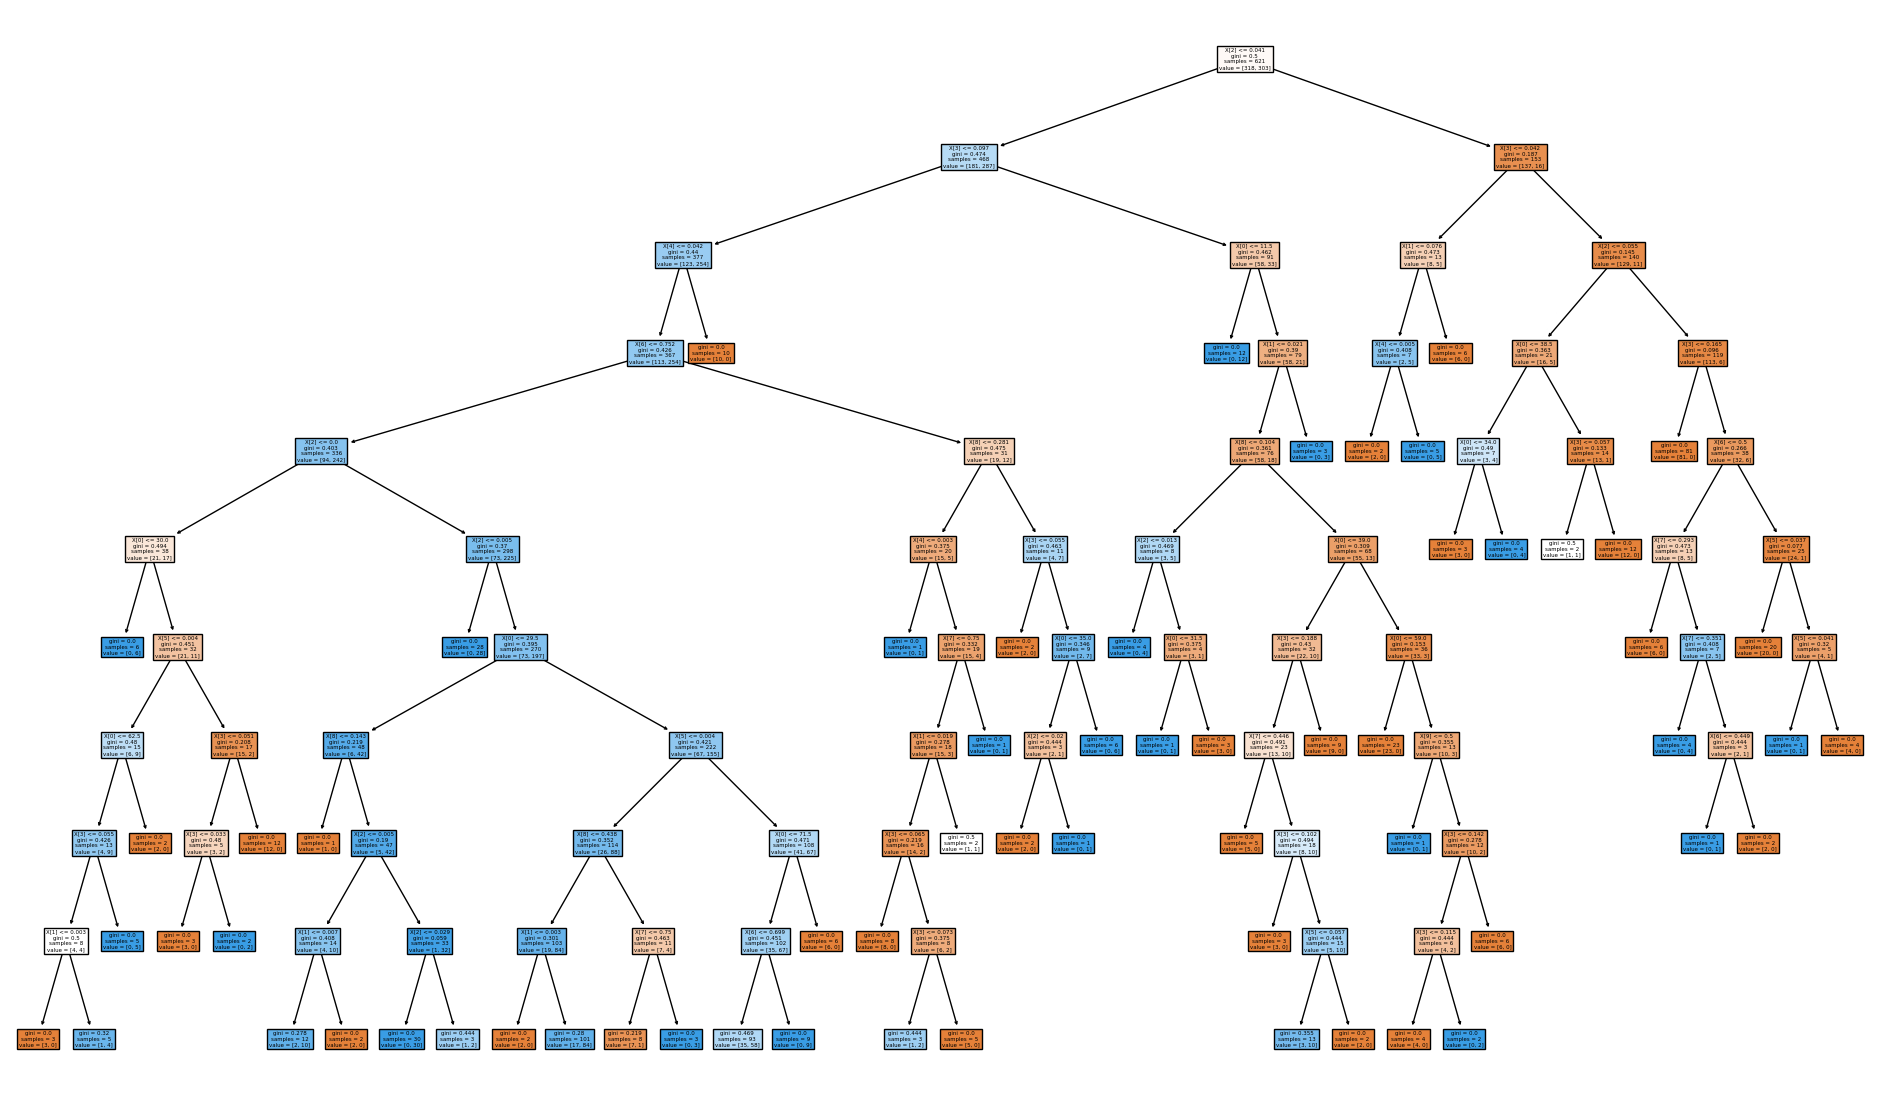

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(24,14))
plot_tree(dt1, filled=True)

## RandomForest Implementation

In [264]:
#importing randomforest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)     #object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)                          #training the data

RandomForestClassifier()

In [194]:
y_p=rf_clf.predict(X_train)
f1_score(y_train,y_p)

1.0

In [195]:
y_predict=rf_clf.predict(X_test)#testing

In [196]:
from sklearn.metrics import accuracy_score,classification_report,f1_score 
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.80      0.68      0.73        96
           2       0.75      0.86      0.80       111

    accuracy                           0.77       207
   macro avg       0.78      0.77      0.77       207
weighted avg       0.78      0.77      0.77       207



In [197]:
f_Score=f1_score(y_test,y_predict)
f_Score

0.7344632768361582

## Hyperparameter Tuning

* n_estimators = number of trees in the foreset

* max_features =These are the maximum number of features Random Forest is allowed to try in individual tree. There are multiple options available in Python to assign maximum features

* max_depth =The depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information              about the data

* min_samples_split =the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node

* min_samples_leaf = minimum number of data points allowed in a leaf node



In [176]:
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=4000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
min_samples_split = [2, 5, 10]                                 #minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]                                  #minimum number of samples required to be at a leaf node.


#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictinoary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.





rf_cv.fit(X_train, y_train)                                  ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")                  ##printing  best parameters
 


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1466, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 100})


In [204]:

#passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators= 2000, min_samples_split= 2, min_samples_leaf= 1, 
                                 max_features= 'log2', max_depth= 150)



rf_clf2.fit(X_train, y_train)

y_predict1=rf_clf2.predict(X_test)

f1_score(y_test,y_predict1)

0.7356321839080459

In [205]:
y_pre=rf_clf2.predict(X_train)

f1_score(y_test,y_predict1)

0.7356321839080459

In [208]:
from sklearn.metrics import accuracy_score,classification_report,f1_score 
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           1       0.82      0.67      0.74        96
           2       0.75      0.87      0.81       111

    accuracy                           0.78       207
   macro avg       0.79      0.77      0.77       207
weighted avg       0.78      0.78      0.77       207



# KNN

In [210]:
from sklearn.neighbors import KNeighborsClassifier
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 
    # if predicted value is not equal to actual value, returns true (which is taken as 1) else false(0). 
    # Adds all the value and takes mean of it. So for each k-value, gets the mean of error.
    #print(np.mean(pred_i != y_test))

In [211]:
error_rate

[0.27053140096618356,
 0.3188405797101449,
 0.3140096618357488,
 0.33816425120772947,
 0.30434782608695654,
 0.3140096618357488,
 0.28019323671497587,
 0.3140096618357488,
 0.30917874396135264,
 0.3188405797101449]

In [212]:
pred_i

array([2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2], dtype=int64)

Text(0, 0.5, 'Error Rate')

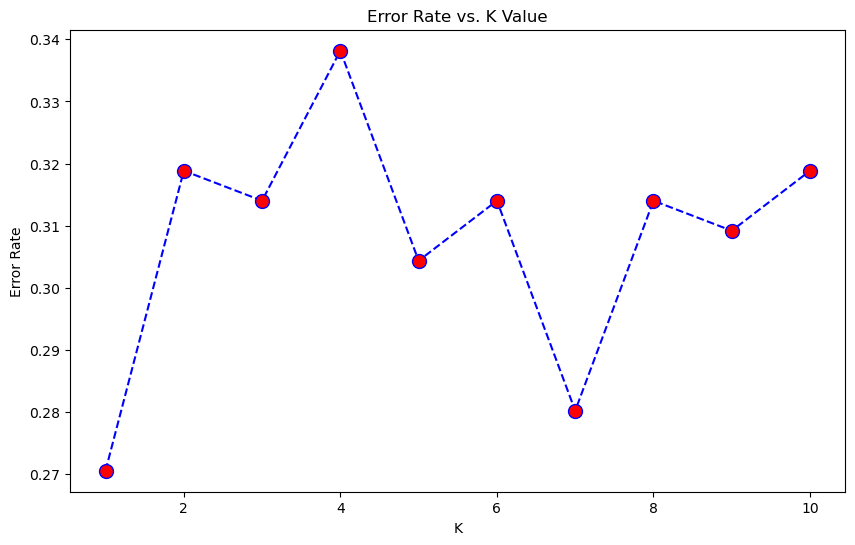

In [213]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [223]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define the range of k values to test
k_range = range(1, 31)

k_scores = []             # Create an empty list 

# Iterate over the k values
for k in k_range:
    # Create a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # Compute the cross-validation score for 5 folds
    scores = cross_val_score(knn, data4, data4, cv=5, scoring='accuracy')
    # Append the average score across the 5 folds to the k_scores list
    k_scores.append(np.mean(scores))

# Find the value of k that gives the highest cross-validation score
best_k = k_range[np.argmax(k_scores)]
print("The best value of k is {}".format(best_k))


The best value of k is 1


In [224]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)# Predict 
y_pred = knn.predict(X_test)

In [225]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.7294685990338164


In [226]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.77      0.59      0.67        96
           2       0.71      0.85      0.77       111

    accuracy                           0.73       207
   macro avg       0.74      0.72      0.72       207
weighted avg       0.74      0.73      0.72       207



# EVALUATION MATRIX

In [302]:
MODELS = ['LOGISTIC ', 'ARTIFICIAL NEURAL NETWORK', 'NAIVE BAYES', 'SVM','DECISION TREE','RANDOM FOREST','KNN'] 
F1 = [57, 63, 58, 65,64,73,69]
ACCURACY=[70,49,69,66,78,78,72]

# Create dictionary from keys and values
data = {'MODELS': MODELS, 'F1_SCORES': F1,'ACCURACY':ACCURACY}
df = pd.DataFrame(data)

# Print the resulting DataFrame
df


,MODELS,F1_SCORES,ACCURACY
0,LOGISTIC,57,70
1,ARTIFICIAL NEURAL NETWORK,63,49
2,NAIVE BAYES,58,69
3,SVM,65,66
4,DECISION TREE,64,78
5,RANDOM FOREST,73,78
6,KNN,69,72


# comparing the accuracy among the models we can compute that "DECISION TREE" and "RANDOM FOREST" give the best accuracy score for our dataset 